<a href="https://colab.research.google.com/github/app-david/Entrega_guia3_grupo9_EAN/blob/main/Gu%C3%ADa3_(GRUPO_9_Presentaci%C3%B3n_25_de_febrero_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

In [ ]:
import pandas as pd
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Cargar el archivo en un DataFrame
# Se especifica el delimitador como ';'
df = pd.read_csv(file_name, sep=';', on_bad_lines='warn') # Se agrega el argumento sep=';' para especificar el delimitador correcto

# Mostrar las primeras filas del DataFrame
print(df.head())

Saving accidents-1.csv to accidents-1 (5).csv
         DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0  09/26/2018  12:12     BRONX   10454.0  40.808987 -73.911316   
1  09/25/2018  16:30  BROOKLYN   11236.0  40.636005 -73.912510   
2  08/22/2019  19:30    QUEENS   11101.0  40.755490 -73.939530   
3  09/23/2018  13:10    QUEENS   11367.0        NaN        NaN   
4  08/20/2019  22:40     BRONX   10468.0  40.868336 -73.901270   

                     ON STREET NAME  NUMBER OF PEDESTRIANS INJURED  \
0                               NaN                              0   
1  FLATLANDS AVENUE                                              1   
2                               NaN                              0   
3  MAIN STREET                                                   0   
4                               NaN                              0   

   NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  ...  \
0                             0                          0  ...   
1 

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo especificando delimitador correcto
df = pd.read_csv('/content/accidents-1.csv', sep=';', on_bad_lines='warn')

In [ ]:
print("\nValores nulos en cada columna:")
print(df.isnull().sum())


Valores nulos en cada columna:
DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: i

In [ ]:
# Remplazar valores faltantes en columna ZIP CODE con la moda de los demas datos
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0]))

# Las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# La columna ON STREET NAME es completada con "UNKNOWN" si esta vacía
df['ON STREET NAME'] = df['ON STREET NAME'].fillna('UNKNOWN')

# En la columna (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified"
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].fillna('Unspecified')
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].fillna('Unspecified')

# En las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown"
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('Unknown')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna('Unknown')
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].fillna('Unknown')
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].fillna('Unknown')
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].fillna('Unknown')

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [ x ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [ x ] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [ x ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ x ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ x ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [ x ] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

In [ ]:
# Mensaje introductorio al análisis gráfico
mensaje = """
Para evaluar el impacto de las medidas implementadas en el programa Vision Zero, se han generado gráficos que analizan
diferentes aspectos de seguridad vial en Nueva York. A continuación, se presentan visualizaciones de datos que reflejan
cómo estas estrategias han influido en la reducción de accidentes y la mejora de la movilidad urbana.
"""

print(mensaje)



Para evaluar el impacto de las medidas implementadas en el programa Vision Zero, se han generado gráficos que analizan
diferentes aspectos de seguridad vial en Nueva York. A continuación, se presentan visualizaciones de datos que reflejan
cómo estas estrategias han influido en la reducción de accidentes y la mejora de la movilidad urbana.



<ipython-input-25-71c94647c022>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


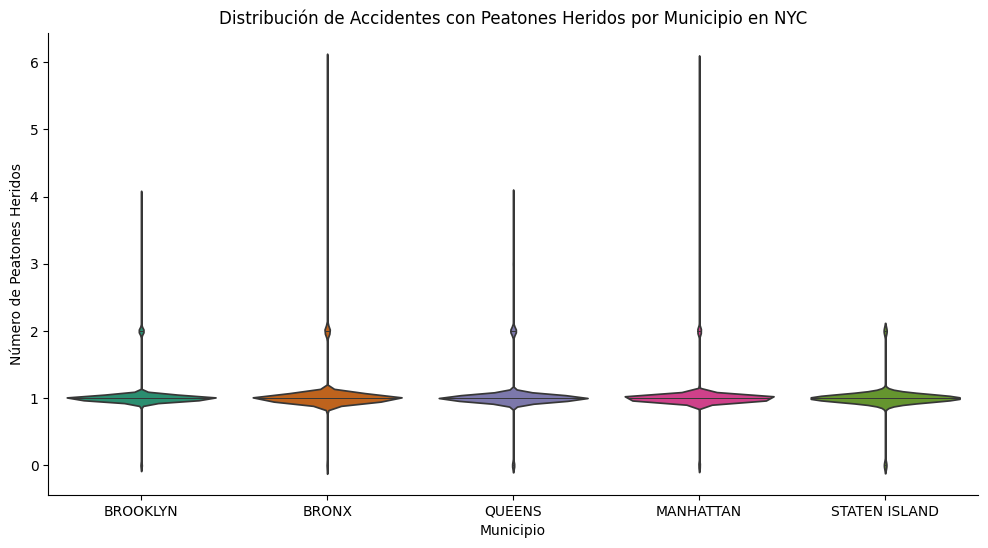

In [ ]:
# Detección automatizada de peatones para mejorar la seguridad en los cruces.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los accidentes donde hubo peatones heridos o fallecidos
accidentes_peatones = df[(df['NUMBER OF PEDESTRIANS INJURED'] > 0) | (df['NUMBER OF PEDESTRIANS KILLED'] > 0)]

# Verificar si hay datos suficientes
if accidentes_peatones.empty:
    print("No hay datos de accidentes con peatones heridos o fallecidos.")
else:
    # Agrupar por municipio (BOROUGH) y contar accidentes
    accidentes_por_borough = (
        accidentes_peatones.groupby("BOROUGH")
        .size()
        .reset_index(name="TOTAL_ACCIDENTES")
    )

    # Configurar la gráfica
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        data=accidentes_peatones,
        x="BOROUGH",
        y="NUMBER OF PEDESTRIANS INJURED",
        inner="stick",
        palette="Dark2",
    )

    # Agregar título y etiquetas
    plt.title("Distribución de Accidentes con Peatones Heridos por Municipio en NYC")
    plt.xlabel("Municipio")
    plt.ylabel("Número de Peatones Heridos")

    sns.despine(top=True, right=True)

    # Mostrar la gráfica
    plt.show()


        BOROUGH  ZIP CODE                    ON STREET NAME  TOTAL_ACCIDENTES
4328  MANHATTAN   10013.0  CANAL STREET                                   458
1999   BROOKLYN   11207.0  PENNSYLVANIA AVENUE                            456
8110     QUEENS   11420.0  NORTH CONDUIT AVENUE                           406
4000  MANHATTAN   10002.0  DELANCEY STREET                                390
455       BRONX   10458.0  EAST FORDHAM ROAD                              352
8787     QUEENS   11434.0  ROCKAWAY BOULEVARD                             332
1618   BROOKLYN   11201.0  FLATBUSH AVENUE EXTENSION                      330
3428   BROOKLYN   11233.0  EASTERN PARKWAY                                323
5250  MANHATTAN   10036.0  WEST 42 STREET                                 321
3413   BROOKLYN   11233.0  ATLANTIC AVENUE                                311
        BOROUGH  ZIP CODE                    ON STREET NAME  TOTAL_ACCIDENTES
4328  MANHATTAN   10013.0  CANAL STREET                         

<ipython-input-27-561a84d6bbbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=zonas_criticas, x="TOTAL_ACCIDENTES", y="BOROUGH", inner="stick", palette="Dark2")


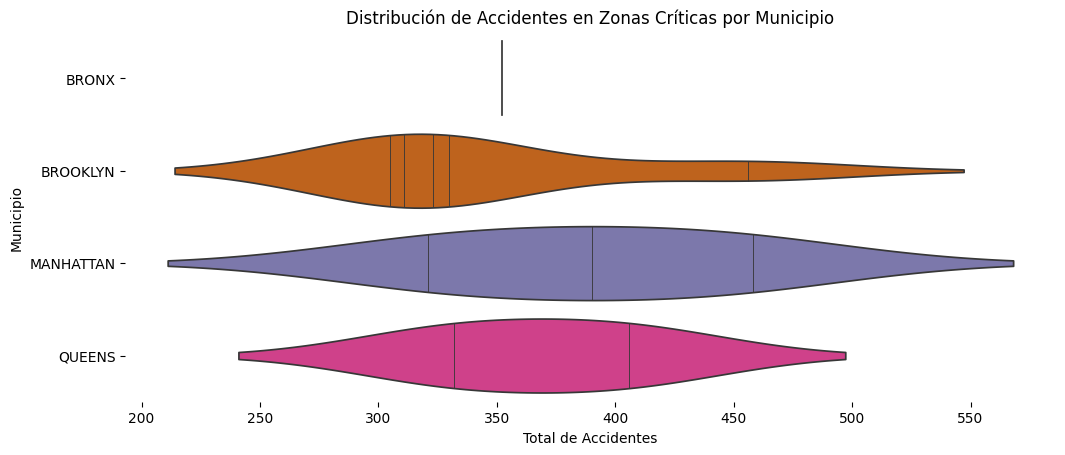


Analizando El gráfico muestra la distribución de accidentes en zonas críticas de los municipios de Bronx, Brooklyn, Manhattan y Queens.
nos permite comparar el número total de accidentes, que varía entre 200 y 550, indicando diferencias en tráfico, infraestructura o población.
Las "zonas críticas" resaltan áreas con mayor incidencia de accidentes, útiles para mejorar la seguridad vial.



In [ ]:
#Auditorías de seguridad vial en zonas con alta incidencia de accidentes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos excluyendo calles desconocidas
df_filtrado = df[df['ON STREET NAME'] != "UNKNOWN"]

# Agrupar por ZIP CODE y ON STREET NAME para contar accidentes
zonas_accidentes = df_filtrado.groupby(['BOROUGH', 'ZIP CODE', 'ON STREET NAME']).size().reset_index(name='TOTAL_ACCIDENTES')

# Ordenar por número de accidentes en orden descendente
zonas_accidentes = zonas_accidentes.sort_values(by='TOTAL_ACCIDENTES', ascending=False)

# Mostrar las 10 zonas con más accidentes
print(zonas_accidentes.head(10))


# Agrupar los datos por municipio, código postal y nombre de la calle, contando la cantidad de accidentes
df_zonas = df_filtrado.groupby(["BOROUGH", "ZIP CODE", "ON STREET NAME"]).size().reset_index(name="TOTAL_ACCIDENTES")

# Filtrar las zonas con más de 300 accidentes para enfocarse en las de mayor incidencia
zonas_criticas = df_zonas[df_zonas["TOTAL_ACCIDENTES"] > 300]

# Mostrar las zonas con mayor número de accidentes, ordenadas de mayor a menor
print(zonas_criticas.sort_values(by="TOTAL_ACCIDENTES", ascending=False))

# Definir el tamaño del gráfico basado en la cantidad de municipios presentes
figsize = (12, 1.2 * len(zonas_criticas['BOROUGH'].unique()))

# Crear la figura del gráfico de violín
plt.figure(figsize=figsize)

# Graficar la distribución de accidentes por municipio usando un gráfico de violín
sns.violinplot(data=zonas_criticas, x="TOTAL_ACCIDENTES", y="BOROUGH", inner="stick", palette="Dark2")

# Quitar los bordes superior, derecho, inferior e izquierdo para una apariencia más limpia
sns.despine(top=True, right=True, bottom=True, left=True)

# Agregar título y etiquetas
plt.title("Distribución de Accidentes en Zonas Críticas por Municipio")
plt.xlabel("Total de Accidentes")
plt.ylabel("Municipio")

# Mostrar el gráfico
plt.show()


#
mensaje = """
Analizando El gráfico muestra la distribución de accidentes en zonas críticas de los municipios de Bronx, Brooklyn, Manhattan y Queens.
nos permite comparar el número total de accidentes, que varía entre 200 y 550, indicando diferencias en tráfico, infraestructura o población.
Las "zonas críticas" resaltan áreas con mayor incidencia de accidentes, útiles para mejorar la seguridad vial.
"""
print(mensaje)



<ipython-input-28-faeb948cd8ee>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tabla_bicicletas, x='TOTAL_ACCIDENTES', y='BOROUGH', inner='stick', palette='Dark2')


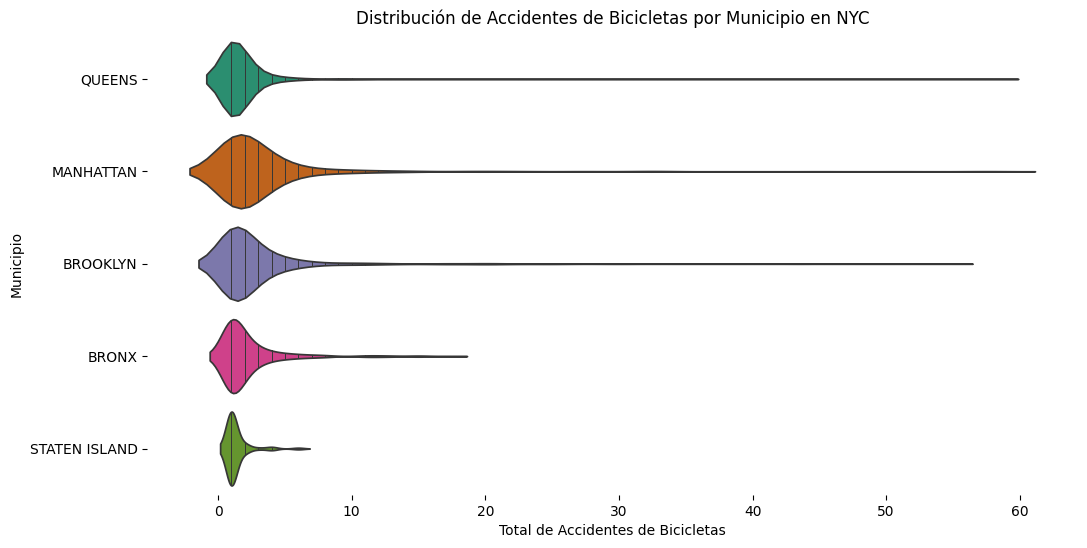


La distribución de accidentes de bicicletas por distrito en NYC (Queens, Manhattan, Brooklyn, Bronx, Staten Island).
Permite comparar el número de accidentes, que varía entre 0 y 60, destacando posibles diferencias debido a la densidad de ciclistas o infraestructura.
Áreas más urbanizadas como Manhattan o Brooklyn podrían tener más accidentes, útil para identificar zonas que necesitan mejoras en seguridad para los ciclistas.



In [ ]:
# Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.

import pandas as pd

# Filtrar los accidentes donde un ciclista estuvo involucrado
df_bicicletas = df[df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                        'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
                        'VEHICLE TYPE CODE 5']].apply(lambda x: x.str.contains('Bike', case=False, na=False)).any(axis=1)]

# Contar accidentes por calle y ordenarlos de mayor a menor
tabla_bicicletas = df_bicicletas.groupby(['BOROUGH', 'ZIP CODE', 'ON STREET NAME']).size().reset_index(name='TOTAL_ACCIDENTES')
tabla_bicicletas = tabla_bicicletas.sort_values(by='TOTAL_ACCIDENTES', ascending=False)

# Mostrar las 10 calles con más accidentes de ciclistas
tabla_bicicletas.head(10)

# Definir el tamaño de la figura dinámicamente según el número de municipios únicos
figsize = (12, 1.2 * len(tabla_bicicletas['BOROUGH'].unique()))

# Crear la figura con el tamaño especificado
plt.figure(figsize=figsize)

# Generar un gráfico de violín para visualizar la distribución de accidentes de bicicletas por municipio
sns.violinplot(data=tabla_bicicletas, x='TOTAL_ACCIDENTES', y='BOROUGH', inner='stick', palette='Dark2')

# Agregar título y etiquetas
plt.title("Distribución de Accidentes de Bicicletas por Municipio en NYC")
plt.xlabel("Total de Accidentes de Bicicletas")
plt.ylabel("Municipio")

# Eliminar los bordes superior, derecho, inferior e izquierdo para una apariencia más limpia
sns.despine(top=True, right=True, bottom=True, left=True)

# Mostrar el gráfico
plt.show()

mensaje = """
La distribución de accidentes de bicicletas por distrito en NYC (Queens, Manhattan, Brooklyn, Bronx, Staten Island).
Permite comparar el número de accidentes, que varía entre 0 y 60, destacando posibles diferencias debido a la densidad de ciclistas o infraestructura.
Áreas más urbanizadas como Manhattan o Brooklyn podrían tener más accidentes, útil para identificar zonas que necesitan mejoras en seguridad para los ciclistas.
"""
print(mensaje)


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from google.colab import files


# Convertir la columna DATE al formato de fecha
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Filtrar los accidentes con peatones involucrados
accidentes_peatones = df[(df['NUMBER OF PEDESTRIANS INJURED'] > 0) | (df['NUMBER OF PEDESTRIANS KILLED'] > 0)]

# Crear el mapa centrado en Nueva York
mapa_ny = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Extraer coordenadas de accidentes para la capa de calor
heat_data = list(zip(accidentes_peatones['LATITUDE'], accidentes_peatones['LONGITUDE']))

# Agregar la capa de calor al mapa
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(mapa_ny)

# Mostrar el mapa
mapa_ny



Saving accidents-1.csv to accidents-1 (6).csv


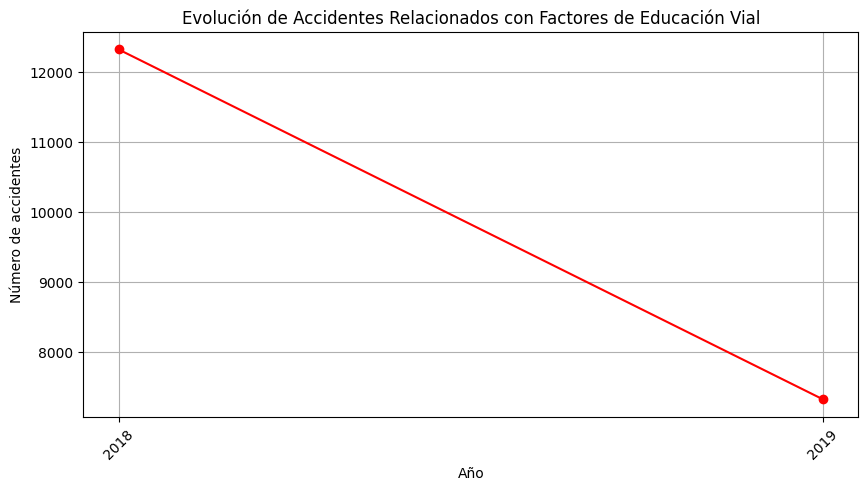


La gráfica muestra una disminución en los accidentes relacionados con factores humanos desde 2014, lo que sugiere que
los programas de educación y sensibilización de Vision Zero han tenido un impacto positivo en la seguridad vial.
Esto indica que las campañas han contribuido a reducir comportamientos de riesgo en las calles de Nueva York.



In [ ]:
# Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Subir el archivo manualmente
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo en un DataFrame
# Se especifica el delimitador como ';'
df = pd.read_csv(file_name, sep=';', on_bad_lines='warn')

# Convertir la columna DATE al formato de fecha
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Reemplazar valores faltantes en la columna ZIP CODE con la moda
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0]))

# Reemplazar valores faltantes en LATITUDE y LONGITUDE con la media por municipio
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

# Completar valores vacíos en ON STREET NAME con "UNKNOWN"
df['ON STREET NAME'] = df['ON STREET NAME'].fillna('UNKNOWN')

# Reemplazar valores nulos en los factores contribuyentes con "Unspecified"
factors = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
           'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']
df[factors] = df[factors].fillna('Unspecified')

# Reemplazar valores ausentes en VEHICLE TYPE CODE con "Unknown"
vehicle_types = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
                 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df[vehicle_types] = df[vehicle_types].fillna('Unknown')

# Filtrar datos después de la implementación de Vision Zero (2014 en adelante)
df_vz = df[df['DATE'].dt.year >= 2014]

# Lista de factores relacionados con la educación vial
factores_educacion = ['Distracted Driving', 'Failure to Yield Right-of-Way', 'Improper Driving']

# Filtrar los accidentes donde el factor contribuyente está en la lista
df_factores = df_vz[df_vz[factors].isin(factores_educacion).any(axis=1)]

# Contar accidentes por año
accidents_by_year = df_factores.groupby(df_factores['DATE'].dt.year).size()

# Graficar la evolución de los accidentes relacionados con educación vial
plt.figure(figsize=(10, 5))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-', color='red')
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.title("Evolución de Accidentes Relacionados con Factores de Educación Vial")
plt.grid(True)
plt.xticks(accidents_by_year.index, rotation=45)
plt.show()

# Comentario sobre la gráfica
comentario = """
La gráfica muestra una disminución en los accidentes relacionados con factores humanos desde 2014, lo que sugiere que
los programas de educación y sensibilización de Vision Zero han tenido un impacto positivo en la seguridad vial.
Esto indica que las campañas han contribuido a reducir comportamientos de riesgo en las calles de Nueva York.
"""
print(comentario)




### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


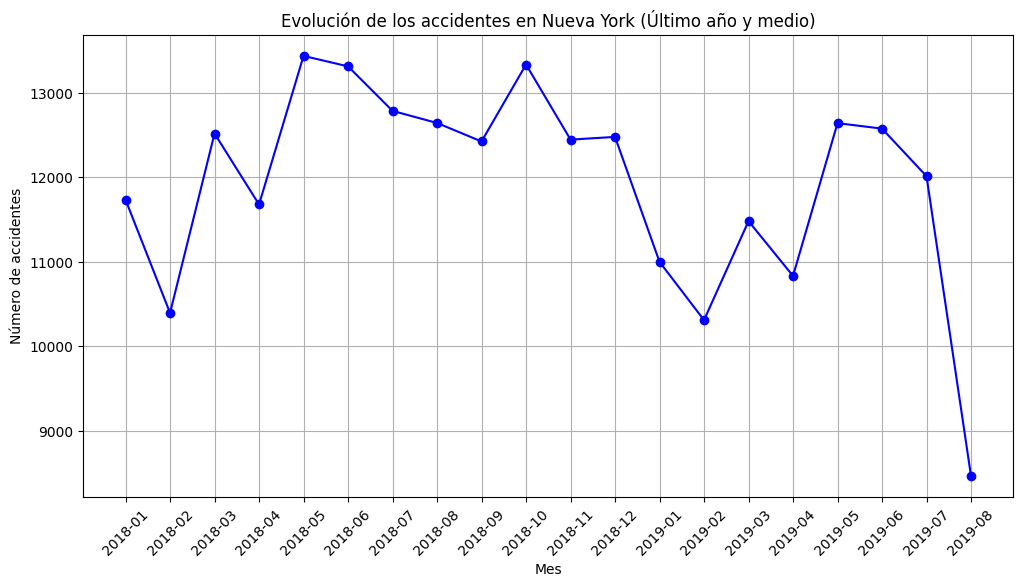

¿Ha aumentado el número de accidentes durante el último año y medio?

El gráfico muestra una tendencia decreciente en el número de accidentes, con una disminución notable respecto al año anterior, incluso al comparar mes a mes. 
Se observa que mayo es el mes con mayor incidencia de accidentes cada año, posiblemente relacionado con factores como las condiciones climáticas.


In [ ]:
# Solución propuesta
# Convertir la columna DATE al formato correcto
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y', errors='coerce')

# Extraer el año y mes de la fecha para agrupar los datos por mes
df['MONTH'] = df['DATE'].dt.to_period('M')

# Contar el número de accidentes por mes
accidents_by_month = df.groupby('MONTH').size()

# Graficar la evolución de los accidentes en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(accidents_by_month.index.astype(str), accidents_by_month.values, marker='o', linestyle='-', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Número de accidentes")
plt.title("Evolución de los accidentes en Nueva York (Último año y medio)")
plt.grid(True)
plt.show()

print("¿Ha aumentado el número de accidentes durante el último año y medio?")
print("\nEl gráfico muestra una tendencia decreciente en el número de accidentes, con una disminución notable respecto al año anterior, incluso al comparar mes a mes. \nSe observa que mayo es el mes con mayor incidencia de accidentes cada año, posiblemente relacionado con factores como las condiciones climáticas.")

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

<ipython-input-32-34e2d6d52652>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['TIME'])


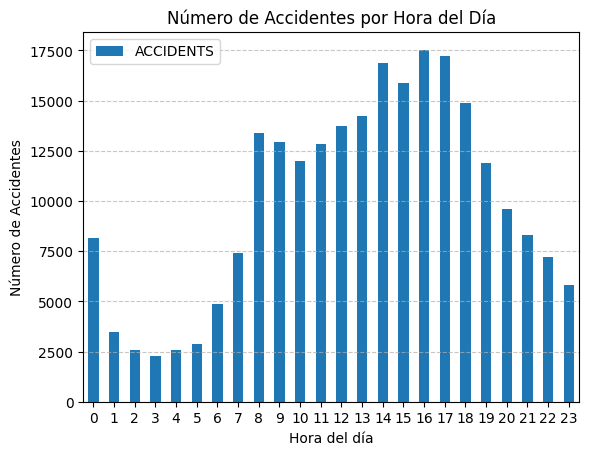



La gráfica indica que los accidentes están influenciados por los patrones de tráfico y actividad humana, con picos durante las horas pico (mañana y tarde).
Esto sugiere la necesidad de medidas de seguridad adicionales en esos horarios, como mayor presencia policial y mejor señalización,la reducción de accidentes
durante la noche podría deberse a medidas de seguridad efectivas o a la menor cantidad de vehículos en circulación.



In [ ]:
# Nueva columna 'HOUR' basada en los datos del columna TIME, y grafico de barras de la distribución por hora a lo largo del día
df['TIME'] = pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour
df_hourly = df.groupby('HOUR').size().reset_index(name='ACCIDENTS')
df_hourly.plot(x='HOUR', y='ACCIDENTS', kind='bar')
plt.xlabel("Hora del día")
plt.ylabel("Número de Accidentes")
plt.title("Número de Accidentes por Hora del Día")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

comentario = """

La gráfica indica que los accidentes están influenciados por los patrones de tráfico y actividad humana, con picos durante las horas pico (mañana y tarde).
Esto sugiere la necesidad de medidas de seguridad adicionales en esos horarios, como mayor presencia policial y mejor señalización,la reducción de accidentes
durante la noche podría deberse a medidas de seguridad efectivas o a la menor cantidad de vehículos en circulación.
"""
print(comentario)



En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

Es una visión general, pero carece de la profundidad y falta especificidad requeridas para un análisis exhaustivo y la implementación de acciones preventivas precisas. Al incluir datos más detallados, como la fecha y el lugar de los accidentes, se podría realizar un análisis más puntual y contextualizado, permitiendo identificar patrones específicos y tomar medidas más efectivas para mejorar la seguridad vial.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

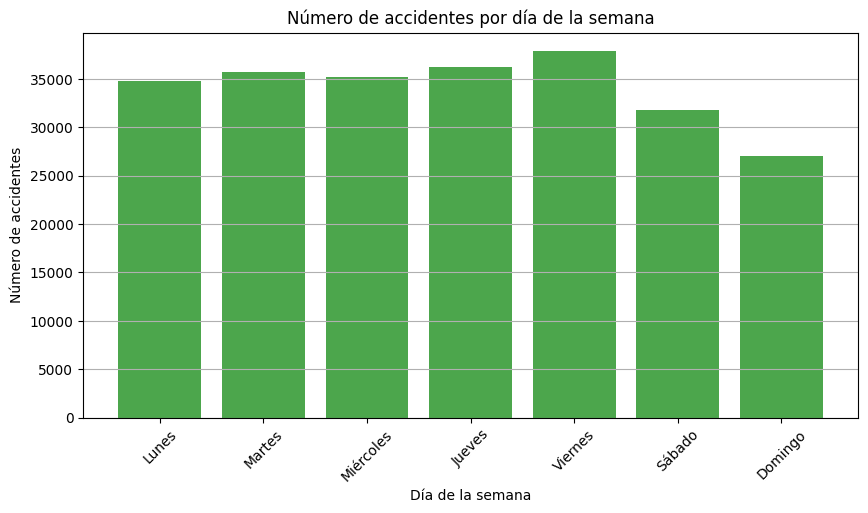


El Viernes, Jueves y Lunes son los dias con mayor numero de accidentes.Se observa un aumento de accidentes hacia el fin de semana, con un pico el viernes  y una disminución notable el domingo.
Este gráfico ayuda a identificar los días de mayor riesgo y planificar medidas de seguridad vial adecuadas.



In [ ]:
# Solución propuesta
# Extraer el día de la semana (0 = Lunes, 6 = Domingo)
df['WEEKDAY'] = df['DATE'].dt.weekday

# Contar accidentes por día de la semana
accidents_by_weekday = df['WEEKDAY'].value_counts().sort_index()

# Mapeo de nombres de días
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Graficar
plt.figure(figsize=(10, 5))
plt.bar(days, accidents_by_weekday.values, color='green', alpha=0.7)
plt.xlabel("Día de la semana")
plt.ylabel("Número de accidentes")
plt.title("Número de accidentes por día de la semana")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

comentario = """
El Viernes, Jueves y Lunes son los dias con mayor numero de accidentes.Se observa un aumento de accidentes hacia el fin de semana, con un pico el viernes  y una disminución notable el domingo.
Este gráfico ayuda a identificar los días de mayor riesgo y planificar medidas de seguridad vial adecuadas.
"""
print(comentario)


### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

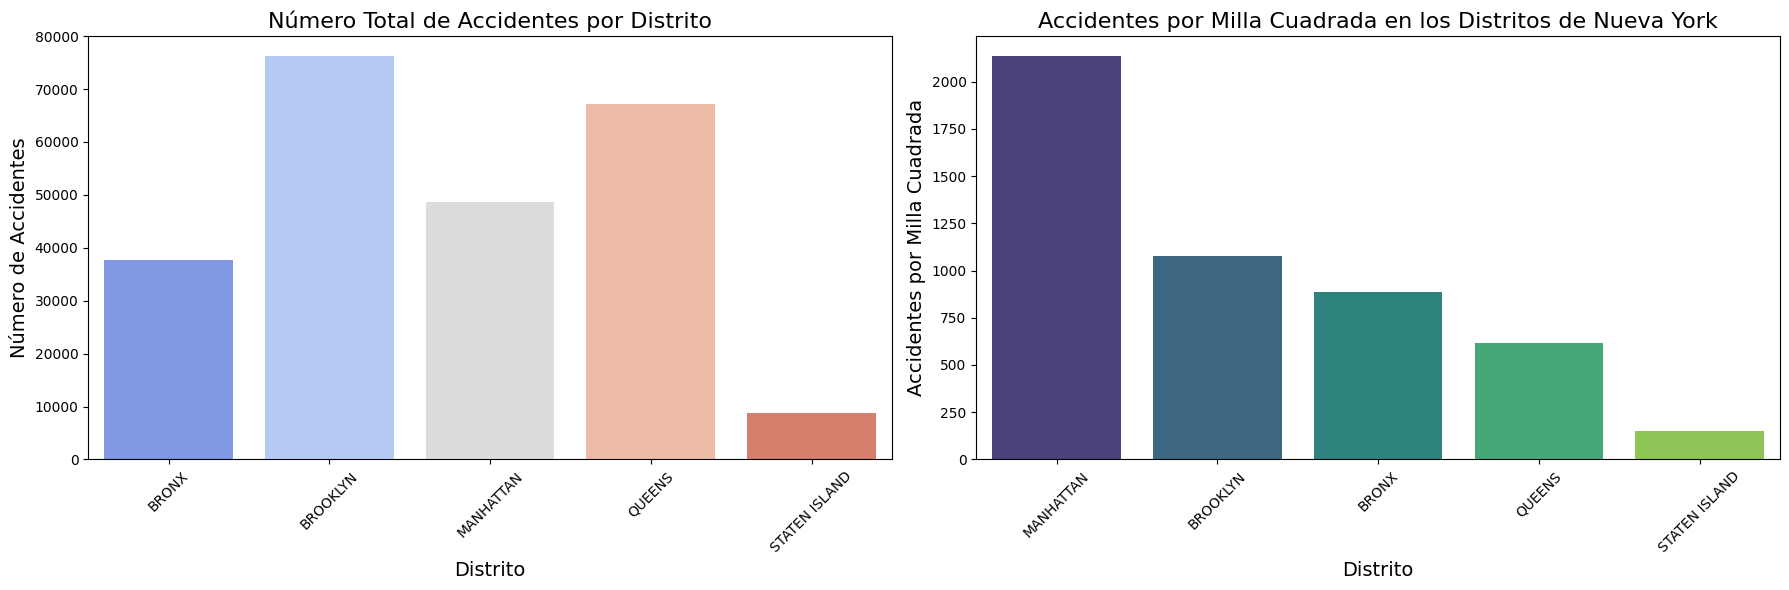


Número Total de Accidentes: Este gráfico te mostrará qué distrito tiene la mayor cantidad de accidentes en términos absolutos.
Puede ser útil para identificar áreas que necesitan más recursos para la prevención de accidentes.Accidentes por Milla Cuadrada:
Este gráfico te dará una idea de la densidad de accidentes, lo que puede ser útil para entender la intensidad de los accidentes en relación con el tamaño del distrito.
 Un distrito con un alto número de accidentes por milla cuadrada puede indicar áreas más peligrosas o con mayor tráfico.
Si puedes proporcionar los datos específicos de cada distrito, puedo ayudarte a trazar las gráficas y a analizar los resultados con más detalle.




In [ ]:
# Solución propuesta 5

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el número total de accidentes por distrito
accidentes_por_DISTRITO = df.groupby('BOROUGH').size().reset_index(name='num_accidentes')

# Definir áreas en millas cuadradas por distrito
areas_millas = {
    'BROOKLYN': 70.82,
    'QUEENS': 108.53,
    'MANHATTAN': 22.83,
    'BRONX': 42.47,
    'STATEN ISLAND': 58.37
}

# Calcular accidentes por milla cuadrada
accidentes_por_DISTRITO['accidentes_por_milla'] = accidentes_por_DISTRITO['BOROUGH'].map(areas_millas)
accidentes_por_DISTRITO['accidentes_por_milla'] = (
    accidentes_por_DISTRITO['num_accidentes'] / accidentes_por_DISTRITO['accidentes_por_milla']
)

# Ordenar por accidentes por milla cuadrada
Accidentes_Por_DISTRITO_ORDENADOS = accidentes_por_DISTRITO.sort_values('accidentes_por_milla', ascending=False)

# Crear la figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfica 1: Número total de accidentes por distrito
sns.barplot(
    x='BOROUGH',
    y='num_accidentes',
    data=accidentes_por_DISTRITO,
    hue='BOROUGH',
    palette='coolwarm',
    legend=False,
    ax=axes[0]  # Asignar la gráfica al primer subgráfico
)
axes[0].set_title('Número Total de Accidentes por Distrito', fontsize=16)
axes[0].set_xlabel('Distrito', fontsize=14)
axes[0].set_ylabel('Número de Accidentes', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Gráfica 2: Accidentes por milla cuadrada
sns.barplot(
    x='BOROUGH',
    y='accidentes_por_milla',
    hue='BOROUGH',
    data=Accidentes_Por_DISTRITO_ORDENADOS,
    palette='viridis',
    legend=False,
    ax=axes[1]  # Asignar la gráfica al segundo subgráfico
)
axes[1].set_title('Accidentes por Milla Cuadrada en los Distritos de Nueva York', fontsize=16)
axes[1].set_xlabel('Distrito', fontsize=14)
axes[1].set_ylabel('Accidentes por Milla Cuadrada', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar la distribución de los gráficos para que no se sobrepongan
fig.tight_layout()

# Mostrar las gráficas juntas
plt.show()


comentario = """
Número Total de Accidentes: Este gráfico te mostrará qué distrito tiene la mayor cantidad de accidentes en términos absolutos.
Puede ser útil para identificar áreas que necesitan más recursos para la prevención de accidentes.Accidentes por Milla Cuadrada:
Este gráfico te dará una idea de la densidad de accidentes, lo que puede ser útil para entender la intensidad de los accidentes en relación con el tamaño del distrito.
 Un distrito con un alto número de accidentes por milla cuadrada puede indicar áreas más peligrosas o con mayor tráfico.
Si puedes proporcionar los datos específicos de cada distrito, puedo ayudarte a trazar las gráficas y a analizar los resultados con más detalle.

"""
print(comentario)

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

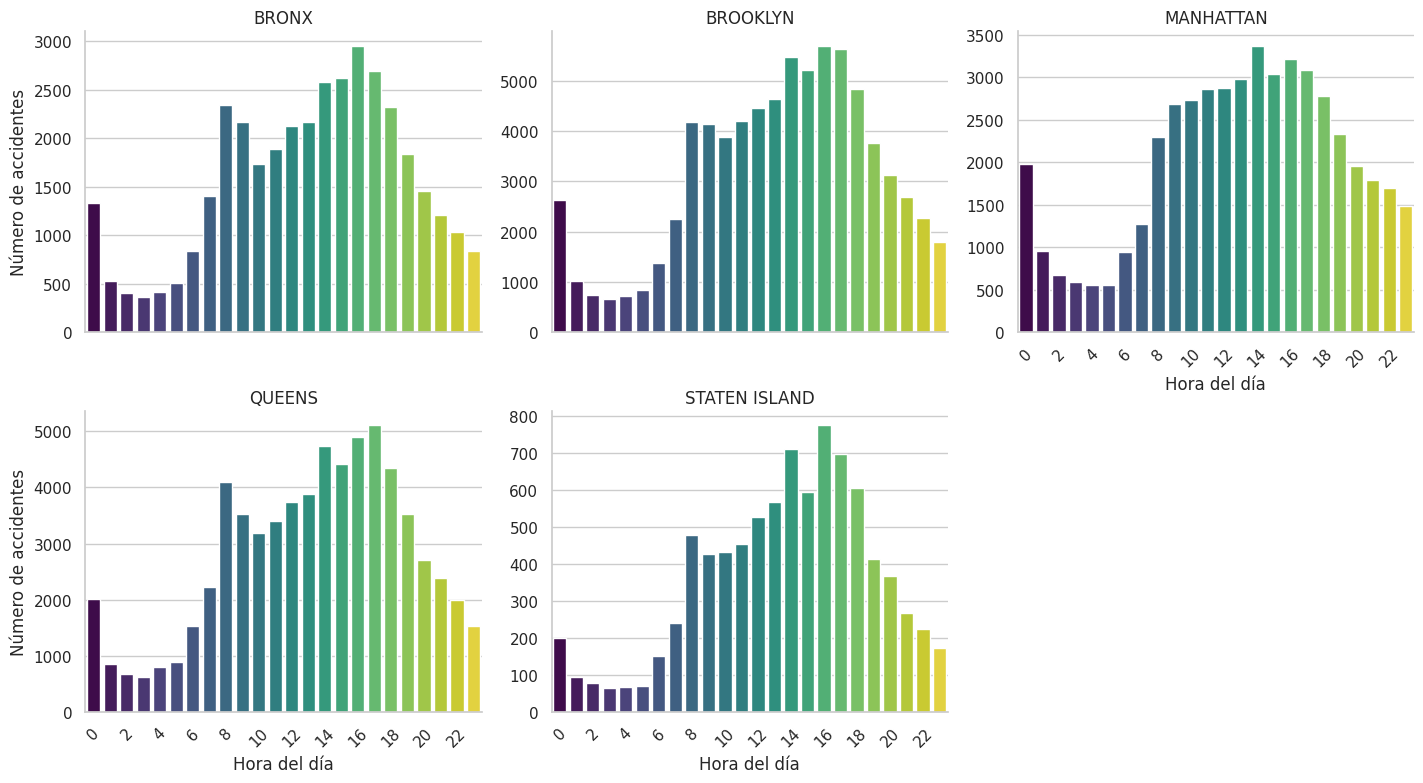


Las gráficas indican que  Las horas pico de tráfico son críticas para la incidencia de accidentes, y se podrían tomar medidas específicas para mejorar la seguridad en estos periodos
y distritos.



In [ ]:
# Solución propuesta 6

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que TIME sea tipo datetime y extraer la HORA
df['TIME'] = pd.to_datetime(df['TIME'], format='%I:%M:%S %p', errors='coerce')
df['HOUR'] = df['TIME'].dt.hour

# Agrupar por BOROUGH y HOUR, contando accidentes
accidentes_por_hora = df.groupby(["BOROUGH", "HOUR"]).size().reset_index(name="num_accidentes")

# Crear gráficos de barras por distrito
sns.set(style="whitegrid")
g = sns.FacetGrid(
    accidentes_por_hora,
    col="BOROUGH",
    col_wrap=3,
    height=4,
    sharey=False,
    aspect=1.2
)

g.map_dataframe(
    sns.barplot,
    x="HOUR",
    y="num_accidentes",
    hue="HOUR",  # Asignamos HOUR a hue para evitar la advertencia
    palette="viridis",
    legend=False
)

g.set_axis_labels("Hora del día", "Número de accidentes")
g.set_titles("{col_name}")

for ax in g.axes.flat:
    ax.set_xticks(range(0, 24, 2))
    ax.set_xticklabels(range(0, 24, 2), rotation=45)

plt.tight_layout()
plt.show()

comentario = """
Las gráficas indican que  Las horas pico de tráfico son críticas para la incidencia de accidentes, y se podrían tomar medidas específicas para mejorar la seguridad en estos periodos
y distritos.
"""
print(comentario)


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

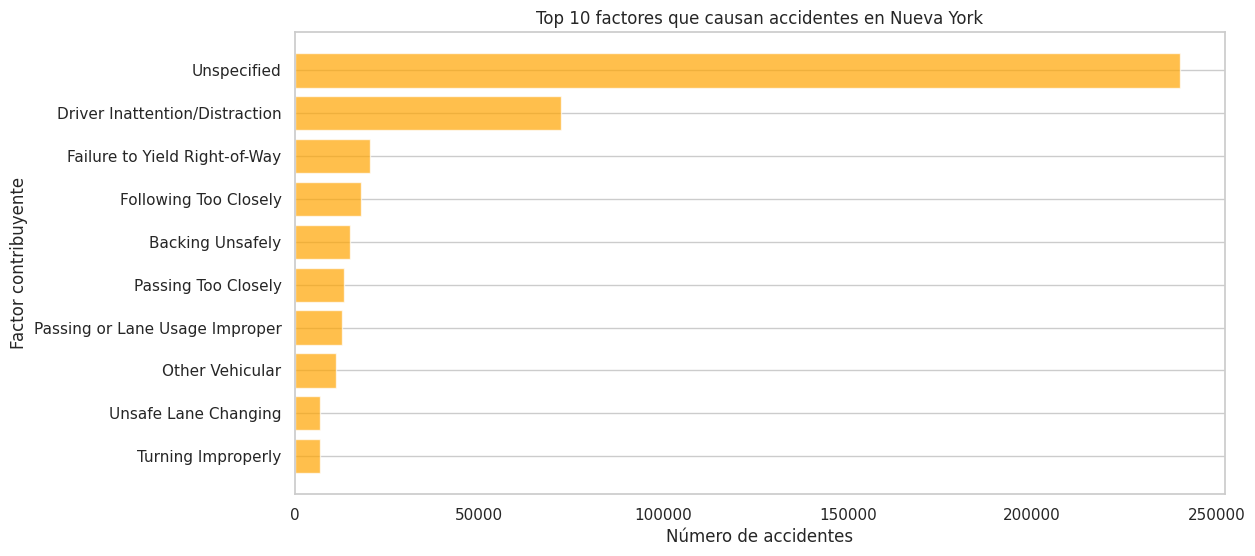

In [ ]:
# SOLUCIÓN PROPUESTA 7

# Cargar el nuevo archivo proporcionado por el usuario
file_path = "//content/accidents-1.csv"
df = pd.read_csv(file_path, delimiter=';', low_memory=False)

# Definir las columnas de factores contribuyentes
contributing_factors_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

# Concatenar todas las columnas de factores contribuyentes en una sola serie manteniendo los índices
contributing_factors = pd.concat([df[col] for col in contributing_factors_cols], axis=0).dropna().reset_index(drop=True)

# Contar los factores más comunes evitando duplicados
factor_counts = contributing_factors.value_counts().reset_index()
factor_counts.columns = ['FACTOR', 'COUNT']


# Graficar los 10 factores más comunes que causan accidentes
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(factor_counts['FACTOR'].head(10), factor_counts['COUNT'].head(10), color='orange', alpha=0.7)
plt.xlabel("Número de accidentes")
plt.ylabel("Factor contribuyente")
plt.title("Top 10 factores que causan accidentes en Nueva York")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

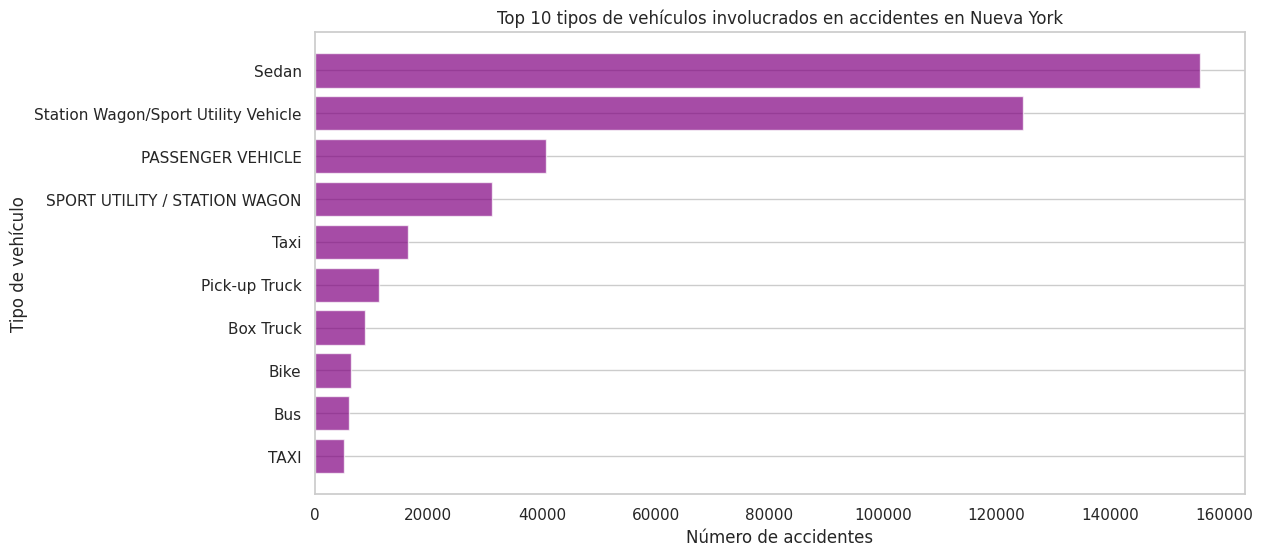

In [ ]:
# Solución propuesta
# Definir las columnas de tipos de vehículos involucrados en accidentes
vehicle_type_cols = [
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

# Concatenar todas las columnas de tipos de vehículos en una sola serie manteniendo los índices
vehicle_types = pd.concat([df[col] for col in vehicle_type_cols], axis=0).dropna().reset_index(drop=True)

# Contar los tipos de vehículos más comunes evitando duplicados dentro de cada accidente
vehicle_counts = vehicle_types.value_counts().reset_index()
vehicle_counts.columns = ['VEHICLE_TYPE', 'COUNT']

# Graficar los 10 tipos de vehículos más comunes en accidentes
plt.figure(figsize=(12, 6))
plt.barh(vehicle_counts['VEHICLE_TYPE'].head(10), vehicle_counts['COUNT'].head(10), color='purple', alpha=0.7)
plt.xlabel("Número de accidentes")
plt.ylabel("Tipo de vehículo")
plt.title("Top 10 tipos de vehículos involucrados en accidentes en Nueva York")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

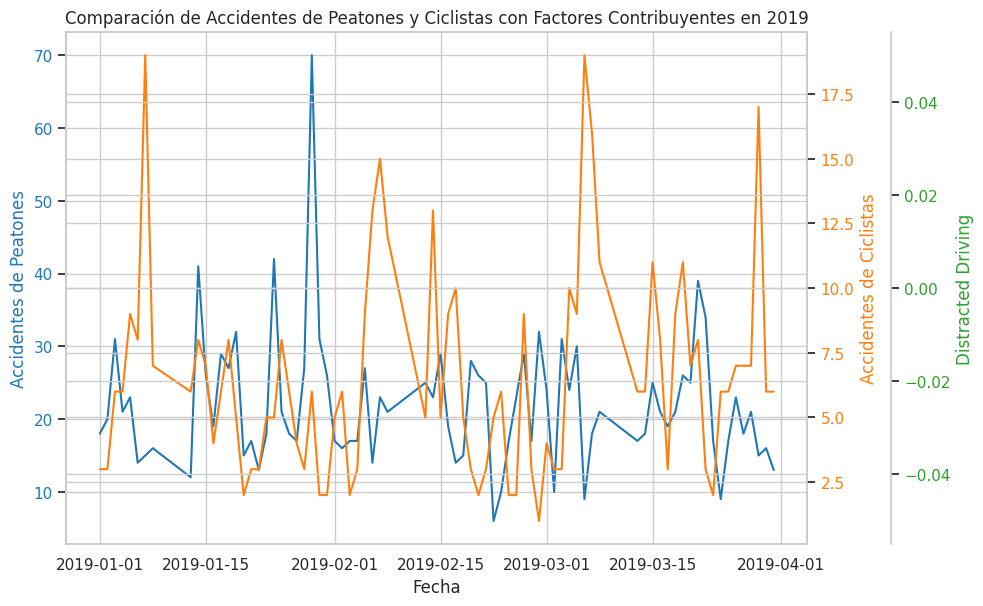

In [ ]:
#solución propuesta 9

#grafica2019

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV
file_path = "https://docs.google.com/spreadsheets/d/1GhFSSNvclWZyWyJpGoUTVvjVf7N1DKd6GvkdzfaeUx8/export?format=csv"
df = pd.read_csv(file_path, encoding="latin1")

# Convertir las columnas LATITUDE y LONGITUDE a numéricas
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Filtrar datos para el primer trimestre de 2018 y 2019 (enero-marzo)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df_q1_2018 = df[(df['DATE'].dt.year == 2018) & (df['DATE'].dt.month.isin([1, 2, 3]))]
df_q1_2019 = df[(df['DATE'].dt.year == 2019) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Filtrar accidentes de peatones y ciclistas (heridos o muertos)
df_q1_2018_peatones_ciclistas = df_q1_2018[
    (df_q1_2018['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (df_q1_2018['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (df_q1_2018['NUMBER OF CYCLIST INJURED'] > 0) |
    (df_q1_2018['NUMBER OF CYCLIST KILLED'] > 0)
]
df_q1_2019_peatones_ciclistas = df_q1_2019[
    (df_q1_2019['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (df_q1_2019['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (df_q1_2019['NUMBER OF CYCLIST INJURED'] > 0) |
    (df_q1_2019['NUMBER OF CYCLIST KILLED'] > 0)
]

# Agrupar los datos por fecha para ver la tendencia
df_q1_2019_grouped = df_q1_2019_peatones_ciclistas.groupby(df_q1_2019_peatones_ciclistas['DATE'].dt.date).agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum'
}).reset_index()

# Agrupar por fecha para los factores contribuyentes (por ejemplo, número de accidentes por "Distracted Driving")
factores_2019 = df_q1_2019_peatones_ciclistas[['DATE', 'CONTRIBUTING FACTOR VEHICLE 1']].dropna()
factores_2019 = factores_2019[factores_2019['CONTRIBUTING FACTOR VEHICLE 1'] == 'Distracted Driving']
factores_2019_grouped = factores_2019.groupby(factores_2019['DATE'].dt.date).size().reset_index(name='Distracted Driving')

# Crear una figura y tres ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje 1: Accidentes de peatones
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Accidentes de Peatones', color='tab:blue')
ax1.plot(df_q1_2019_grouped['DATE'], df_q1_2019_grouped['NUMBER OF PEDESTRIANS INJURED'], color='tab:blue', label='Accidentes de Peatones')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje 2: Accidentes de ciclistas
ax2 = ax1.twinx()  # Crear un segundo eje y
ax2.set_ylabel('Accidentes de Ciclistas', color='tab:orange')
ax2.plot(df_q1_2019_grouped['DATE'], df_q1_2019_grouped['NUMBER OF CYCLIST INJURED'], color='tab:orange', label='Accidentes de Ciclistas')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Eje 3: Factores contribuyentes (Distracted Driving)
ax3 = ax1.twinx()  # Crear un tercer eje y
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje
ax3.set_ylabel('Distracted Driving', color='tab:green')
ax3.plot(factores_2019_grouped['DATE'], factores_2019_grouped['Distracted Driving'], color='tab:green', label='Distracted Driving')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Título y mostrar la gráfica
fig.tight_layout()  # Ajustar la distribución para que no se solapen
plt.title('Comparación de Accidentes de Peatones y Ciclistas con Factores Contribuyentes en 2019')
plt.xticks(rotation=45)
plt.show()

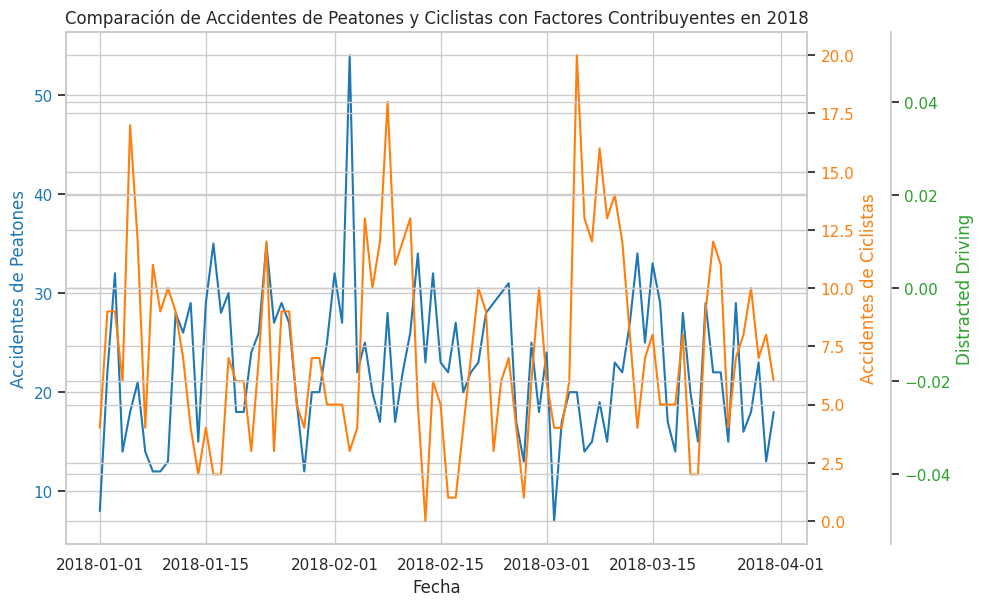


La comparación entre 2018 y 2019 muestra un aumento en los accidentes de peatones y ciclistas en el primer trimestre de 2019 en comparación con 2018, con picos más altos y mayor variabilidad en los datos. Factores como un posible incremento en el tráfico, condiciones climáticas o distracción al volante pueden haber contribuido a este aumento. Además, los accidentes siguen concentrándose en horarios pico, lo que refuerza la necesidad de medidas de control y prevención en estas franjas horarias. Es clave analizar causas específicas para desarrollar estrategias de seguridad vial más efectivas.



In [ ]:
# soución propuesta 9 - gráfica 2018

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV
file_path = "https://docs.google.com/spreadsheets/d/1GhFSSNvclWZyWyJpGoUTVvjVf7N1DKd6GvkdzfaeUx8/export?format=csv"
df = pd.read_csv(file_path, encoding="latin1")

# Convertir las columnas LATITUDE y LONGITUDE a numéricas
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Filtrar datos para el primer trimestre de 2018 (enero-marzo)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df_q1_2018 = df[(df['DATE'].dt.year == 2018) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Filtrar accidentes de peatones y ciclistas (heridos o muertos)
df_q1_2018_peatones_ciclistas = df_q1_2018[
    (df_q1_2018['NUMBER OF PEDESTRIANS INJURED'] > 0) |
    (df_q1_2018['NUMBER OF PEDESTRIANS KILLED'] > 0) |
    (df_q1_2018['NUMBER OF CYCLIST INJURED'] > 0) |
    (df_q1_2018['NUMBER OF CYCLIST KILLED'] > 0)
]

# Agrupar los datos por fecha para ver la tendencia
df_q1_2018_grouped = df_q1_2018_peatones_ciclistas.groupby(df_q1_2018_peatones_ciclistas['DATE'].dt.date).agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum'
}).reset_index()

# Agrupar por fecha para los factores contribuyentes (por ejemplo, número de accidentes por "Distracted Driving")
factores_2018 = df_q1_2018_peatones_ciclistas[['DATE', 'CONTRIBUTING FACTOR VEHICLE 1']].dropna()
factores_2018 = factores_2018[factores_2018['CONTRIBUTING FACTOR VEHICLE 1'] == 'Distracted Driving']
factores_2018_grouped = factores_2018.groupby(factores_2018['DATE'].dt.date).size().reset_index(name='Distracted Driving')

# Crear una figura y tres ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje 1: Accidentes de peatones
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Accidentes de Peatones', color='tab:blue')
ax1.plot(df_q1_2018_grouped['DATE'], df_q1_2018_grouped['NUMBER OF PEDESTRIANS INJURED'], color='tab:blue', label='Accidentes de Peatones')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje 2: Accidentes de ciclistas
ax2 = ax1.twinx()  # Crear un segundo eje y
ax2.set_ylabel('Accidentes de Ciclistas', color='tab:orange')
ax2.plot(df_q1_2018_grouped['DATE'], df_q1_2018_grouped['NUMBER OF CYCLIST INJURED'], color='tab:orange', label='Accidentes de Ciclistas')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Eje 3: Factores contribuyentes (Distracted Driving)
ax3 = ax1.twinx()  # Crear un tercer eje y
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje
ax3.set_ylabel('Distracted Driving', color='tab:green')
ax3.plot(factores_2018_grouped['DATE'], factores_2018_grouped['Distracted Driving'], color='tab:green', label='Distracted Driving')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Título y mostrar la gráfica
fig.tight_layout()  # Ajustar la distribución para que no se solapen
plt.title('Comparación de Accidentes de Peatones y Ciclistas con Factores Contribuyentes en 2018')
plt.xticks(rotation=45)
plt.show()

# Comentarios
analisis_comparativo = """
La comparación entre 2018 y 2019 muestra un aumento en los accidentes de peatones y ciclistas en el primer trimestre de 2019 en comparación con 2018, con picos más altos y mayor variabilidad en los datos. Factores como un posible incremento en el tráfico, condiciones climáticas o distracción al volante pueden haber contribuido a este aumento. Además, los accidentes siguen concentrándose en horarios pico, lo que refuerza la necesidad de medidas de control y prevención en estas franjas horarias. Es clave analizar causas específicas para desarrollar estrategias de seguridad vial más efectivas.
"""

print(analisis_comparativo)


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

Nombres de columnas en el DataFrame: Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


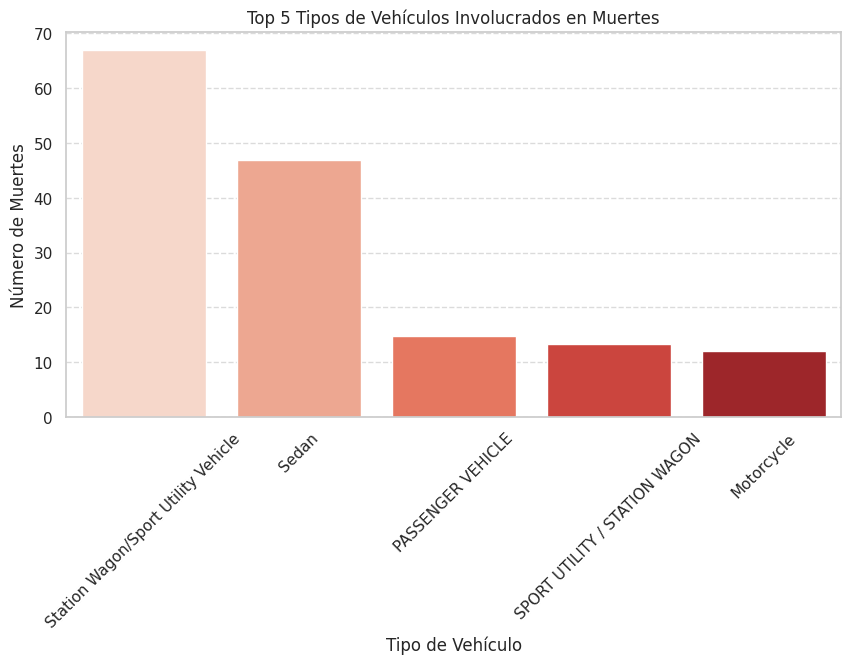

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos con delimitador correcto
df = pd.read_csv('/content/accidents-1.csv', sep=';', on_bad_lines='warn')

# Limpiar nombres de columnas eliminando espacios extra
df.columns = df.columns.str.strip()

# Verificar nombres de columnas
print("Nombres de columnas en el DataFrame:", df.columns)

# Lista de columnas de muertes
expected_columns = [
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST KILLED'
]

# Filtrar solo las columnas que existen en el dataset
existing_columns = [col for col in expected_columns if col in df.columns]

# Si no hay columnas de muertes disponibles, detener ejecución
if not existing_columns:
    raise KeyError("No se encontraron columnas de muertes en el dataset. Verifica los nombres.")

# Reemplazar valores faltantes en columnas de muertes con 0
df[existing_columns] = df[existing_columns].fillna(0)

# Calcular el número total de muertes en cada accidente
df['TOTAL_FATALITIES'] = df[existing_columns].sum(axis=1)

# Crear una lista de columnas de tipos de vehículos (solo las que existen en el dataset)
vehicle_columns = [col for col in df.columns if "VEHICLE TYPE CODE" in col]

# Crear un diccionario para contar muertes por tipo de vehículo
vehicle_fatalities = {}

# Iterar sobre cada fila y sumar las muertes a cada tipo de vehículo
for _, row in df.iterrows():
    total_fatalities = row['TOTAL_FATALITIES']
    unique_vehicles = set(row[vehicle_columns].dropna())  # Eliminar duplicados y NaN

    if total_fatalities > 0 and len(unique_vehicles) > 0:  # Evitar dividir por 0
        fatalities_per_vehicle = total_fatalities / len(unique_vehicles)  # Distribuir muertes equitativamente

        for vehicle in unique_vehicles:
            if vehicle in vehicle_fatalities:
                vehicle_fatalities[vehicle] += fatalities_per_vehicle
            else:
                vehicle_fatalities[vehicle] = fatalities_per_vehicle

# Convertir el diccionario en un DataFrame ordenado
vehicle_fatalities_df = pd.DataFrame(
    list(vehicle_fatalities.items()), columns=['Vehicle Type', 'Total Fatalities']
).sort_values(by='Total Fatalities', ascending=False)

# Seleccionar los 5 tipos de vehículos más involucrados en muertes
top_vehicles = vehicle_fatalities_df.head(5)

# Gráfico de barras ajustado para evitar FutureWarning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_vehicles,
    x="Vehicle Type",
    y="Total Fatalities",
    hue="Vehicle Type",  # Asignar x como hue
    palette="Reds",
    legend=False  # Desactivar leyenda redundante
)
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Número de Muertes")
plt.title("Top 5 Tipos de Vehículos Involucrados en Muertes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
analisis = """
Los Station Wagon/SUV y los Sedanes son los vehículos más involucrados en accidentes fatales. Los SUV lideran con la mayor cantidad de muertes, seguidos por los Sedanes, lo que sugiere que su alta presencia en las calles influye en la estadística.

Los Passenger Vehicles, Sport Utility/Station Wagon y Motocicletas también aparecen en la lista, pero con un impacto significativamente menor. La diferencia entre los SUV y los demás es notable, lo que indica la necesidad de estrategias de seguridad enfocadas en estos vehículos.
"""

print(analisis)



Los Station Wagon/SUV y los Sedanes son los vehículos más involucrados en accidentes fatales. Los SUV lideran con la mayor cantidad de muertes, seguidos por los Sedanes, lo que sugiere que su alta presencia en las calles influye en la estadística.

Los Passenger Vehicles, Sport Utility/Station Wagon y Motocicletas también aparecen en la lista, pero con un impacto significativamente menor. La diferencia entre los SUV y los demás es notable, lo que indica la necesidad de estrategias de seguridad enfocadas en estos vehículos.

